## Observations and Insights 

In [ ]:
1) The correlation coefficient is 0.84 indicating there is a strong positive relationship between the average tumor volume and mouse weight. 
2) Capomulin and Ramicane seem to be the top 2 drug regimens
3) Infubinol seemed to be the only drug with an outlier.

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice.
len(merged_data["Mouse ID"].unique())

249

In [84]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merged_data[merged_data.duplicated(["Mouse ID", "Timepoint"])]
duplicates["Mouse ID"].value_counts()

g989    5
Name: Mouse ID, dtype: int64

In [85]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_data  = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicates_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [86]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data[merged_data["Mouse ID"]!="g989"]
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [40]:
# Checking the number of mice in the clean DataFrame.
cleaned_data["Mouse ID"].count()

len(cleaned_data["Mouse ID"].unique())

248

## Summary Statistics

In [76]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean_tumor = np.mean(cleaned_data["Tumor Volume (mm3)"])
print(f"The mean tumor volume is {mean_tumor}")

median_tumor = np.median(cleaned_data["Tumor Volume (mm3)"])
print(f"The median tumor volume is {median_tumor}")

mode_tumor = st.mode(cleaned_data["Tumor Volume (mm3)"])
print(f"The mode tumor volume is {mode_tumor}")

var_tumor = np.var(cleaned_data["Tumor Volume (mm3)"])
print(f"The population variance of tumor volume is {var_tumor}")

std_tumor = np.std(cleaned_data["Tumor Volume (mm3)"])
print(f"The population standard deviation of tumor volume is {std_tumor}")

sem_tumor = sem(cleaned_data["Tumor Volume (mm3)"])
print(f"The standard error mean of tumor volume is {sem_tumor}")

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_regimen_grouped = cleaned_data.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_drug_regimen = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_drug_regimen = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_drug_regimen = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_drug_regimen = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_drug_regimen = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.

summary = pd.DataFrame({"Mean": mean_drug_regimen, "Median": median_drug_regimen, "Variance": var_drug_regimen, 
                       "Standard Deviation": std_drug_regimen, "SEM": sem_drug_regimen})
summary




The mean tumor volume is 50.435293232255326
The median tumor volume is 48.933453655
The mode tumor volume is ModeResult(mode=array([45.]), count=array([248]))
The population variance of tumor volume is 79.42063964177214
The population standard deviation of tumor volume is 8.911825830982792
The standard error mean of tumor volume is 0.20559062186986257


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [70]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Using the aggregation method, produce the same summary statistics in a single line

cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])




,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

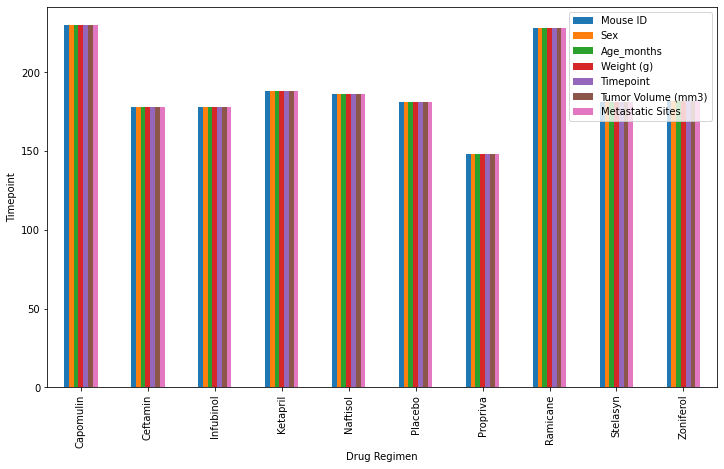

<Figure size 432x288 with 0 Axes>

In [93]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

grouped_regimen = cleaned_data.groupby(["Drug Regimen"]).count()

grouped_chart = grouped_regimen.plot(kind='bar', figsize=(12,7))
                                     
# Set the xlabel and ylabel using class methods
grouped_chart.set_xlabel("Drug Regimen")
grouped_chart.set_ylabel("Timepoint")
                                     
plt.show()
plt.tight_layout()                                     

In [158]:
grouped_regimen


,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


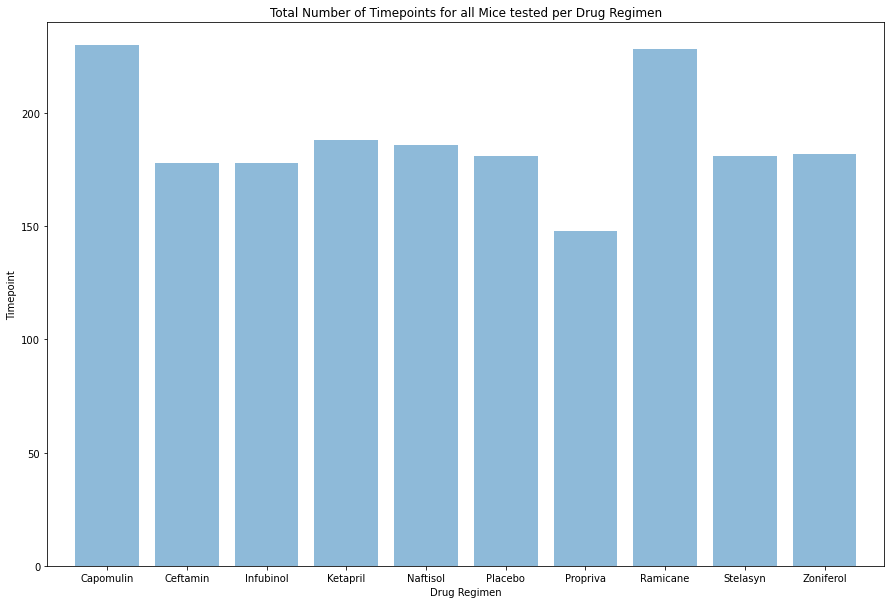

In [271]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#drugs = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn'
        # 'Zoniferol']
drugs = grouped_regimen.index
y_pos = np.arange(len(drugs))
fig1, ax1 = plt.subplots(figsize=(15,10))
timepoints = grouped_regimen["Timepoint"]
plt.bar(y_pos, timepoints, align='center', alpha=0.5)
plt.xticks(y_pos, drugs)
plt.ylabel('Timepoint')
plt.xlabel('Drug Regimen')
plt.title('Total Number of Timepoints for all Mice tested per Drug Regimen')


plt.xlim(-0.75, len(drugs)-0.25)
plt.ylim(0, max(timepoints)+10)


plt.show()
#plt.tight_layout()                        


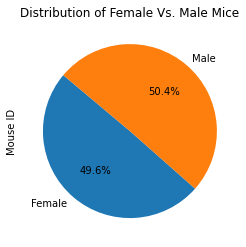

In [272]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_grouped = cleaned_data.groupby('Sex')["Mouse ID"].nunique()

gender_pie = gender_grouped.plot(kind='pie', y = "Mouse ID", title = 'Distribution of Female Vs. Male Mice', 
                                 shadow = False,
                                 startangle=140, autopct = '%1.1f%%'
                                )

plt.show()

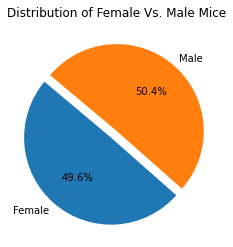

In [132]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
explode = (0.1, 0)

plt.pie(gender_grouped, labels=labels, autopct = '%1.1f%%', shadow = False, startangle = 140, explode = explode)
plt.title('Distribution of Female Vs. Male Mice')

plt.show()

## Quartiles, Outliers and Boxplots

In [144]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

four_drugs = cleaned_data[cleaned_data["Drug Regimen"].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]


# Start by getting the last (greatest) timepoint for each mouse

max_timepoint = four_drugs.groupby("Mouse ID")["Timepoint"].max()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = pd.merge(max_timepoint, cleaned_data, on=("Mouse ID", "Timepoint"), how = 'left')
merged_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [170]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = merged_data["Tumor Volume (mm3)"].quantile([.25, .50, .75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq - lowerq

print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of treatment is: {upperq}")
print(f"The interquartile range of treatment is: {iqr}")

    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatment_list:
    tumor_mice = merged_data.loc[merged_data["Drug Regimen"] == drug,"Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumor_mice)
   
    
    # Determine outliers using upper and lower bounds
    
    upper_bound = upperq + (1.5*iqr)
    lower_bound = lowerq - (1.5*iqr)

    print(f"Values above {upper_bound} could be outliers.")
    print(f"Values below {lower_bound} could be outliers.")

    outliers = tumor_mice.loc[(tumor_mice < lower_bound) | (tumor_mice > upper_bound)]
    print(f"{drug}'s outliers: {outliers}")

The lower quartile of treatment is: 37.1877438025
The upper quartile of treatment is: 59.930261755
The interquartile range of treatment is: 22.742517952499995
Values above 94.04403868374999 could be outliers.
Values below 3.0739668737500097 could be outliers.
Capomulin's outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Values above 94.04403868374999 could be outliers.
Values below 3.0739668737500097 could be outliers.
Ramicane's outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Values above 94.04403868374999 could be outliers.
Values below 3.0739668737500097 could be outliers.
Infubinol's outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Values above 94.04403868374999 could be outliers.
Values below 3.0739668737500097 could be outliers.
Ceftamin's outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


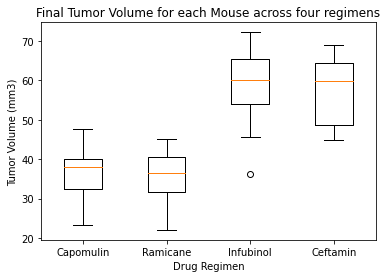

In [236]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume for each Mouse across four regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
labels=treatment_list
ax1.boxplot(tumor_vol_data, labels=labels)
plt.show()



## Line and Scatter Plots

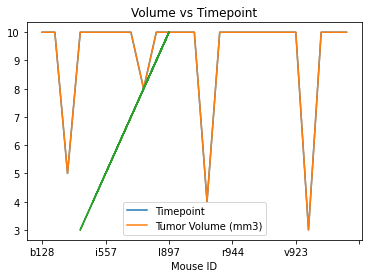

In [273]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
max_timepoint = four_drugs.groupby("Mouse ID")["Timepoint"].max()


capomulin = cleaned_data[cleaned_data["Drug Regimen"].isin(['Capomulin'])]

single_mouse = capomulin.groupby("Mouse ID")[["Timepoint" , "Tumor Volume (mm3)"]].count()

chart = single_mouse.plot(kind="line", title = "Volume vs Timepoint")


plt.plot(single_mouse["Tumor Volume (mm3)"], single_mouse["Timepoint"])   
plt.show()


## Unable to figure out how to make this graph work ##

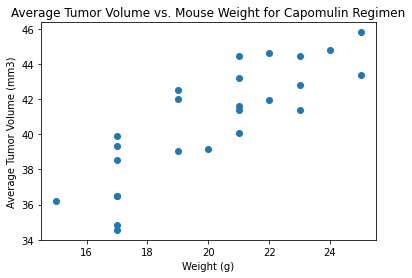

In [209]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

avg_tum_vol = capomulin.groupby(["Mouse ID"]).mean()

plt.scatter(avg_tum_vol["Weight (g)"], avg_tum_vol["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Regimen")
plt.show()


## Correlation and Regression

In [235]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr = round(st.pearsonr(avg_tum_vol["Weight (g)"], avg_tum_vol["Tumor Volume (mm3)"])[0],2)
print(f"The correlation coefficient between mouse weight and average tumor volume is {corr}")

model = st.linregress(avg_tum_vol["Weight (g)"], avg_tum_vol["Tumor Volume (mm3)"])
model

print(f"Linear regression model: y = 0.95x + 21.55")


The correlation coefficient between mouse weight and average tumor volume is 0.84
Linear regression model: y = 0.95x + 21.55


In [240]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_tum_vol["Weight (g)"], 
                                                           avg_tum_vol["Tumor Volume (mm3)"])


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)


y = 0.95x +21.55


In [244]:
# Get regression values
regress_values = avg_tum_vol["Weight (g)"] * slope + intercept
print(regress_values)

Mouse ID
b128    42.549834
b742    41.595394
f966    37.777635
g288    39.686515
g316    42.549834
i557    44.458713
i738    40.640954
j119    43.504273
j246    41.595394
l509    41.595394
l897    39.686515
m601    37.777635
m957    39.686515
r157    45.413153
r554    37.777635
r944    45.413153
s185    37.777635
s710    43.504273
t565    37.777635
u364    37.777635
v923    41.595394
w150    43.504273
w914    41.595394
x401    35.868756
y793    37.777635
Name: Weight (g), dtype: float64


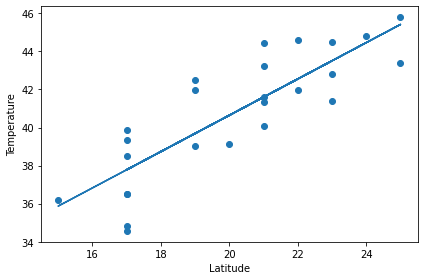

In [248]:
plt.plot(avg_tum_vol["Weight (g)"],regress_values)
plt.scatter(avg_tum_vol["Weight (g)"], avg_tum_vol["Tumor Volume (mm3)"])


# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.tight_layout()
plt.show()